In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.2.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shift/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
# there are 10000 images in test dataset
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

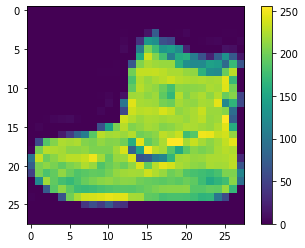

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

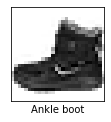

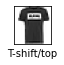

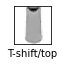

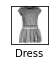

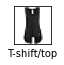

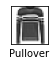

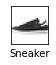

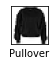

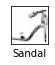

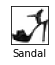

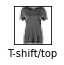

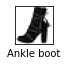

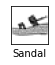

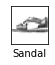

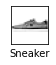

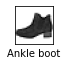

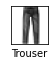

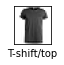

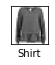

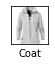

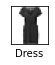

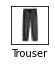

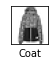

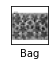

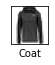

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

In [27]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9854
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0396 - accuracy: 0.9855
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0374 - accuracy: 0.9863
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0391 - accuracy: 0.9860
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0398 - accuracy: 0.9854
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0397 - accuracy: 0.9856
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0383 - accuracy: 0.9858
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9860
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9858
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.036

In [40]:
# To find the accuracy from our test model prediction
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test Accuracy Percentage Rate - ',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.0872 - accuracy: 0.8833
Test Accuracy Percentage Rate -  0.8833000063896179


In [41]:
predictions = model.predict(test_images)

In [45]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.2652131e-16, 0.0000000e+00, 1.8222423e-14,
       3.5797880e-29, 1.0000000e+00], dtype=float32)

In [46]:
np.argmax(predictions[0])

9

In [47]:
# we can check the test label also for prediction value-0
test_labels[0]

9

In [57]:
# let's convert our predictions into image based model
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i],true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  def plot_value_array(i, predictions_array, true_label):
    predictions_array,true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

NameError: ignored

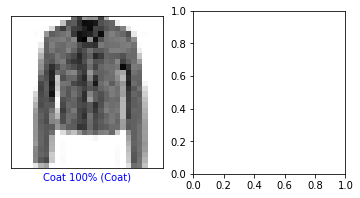

In [64]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

NameError: ignored

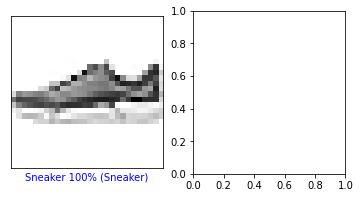

In [68]:
i=9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

NameError: ignored

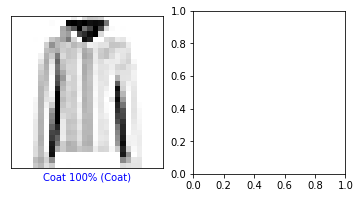

In [69]:
i=6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

NameError: ignored

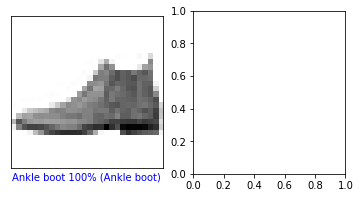

In [70]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()